#    1. Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan *objective* yang ingin dicapai.

- Nama : Fahmi Suwandhi
- Batch : 10

# 2. Import Libraries

> *Cell* pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Library Input missing Value
from sklearn.impute import SimpleImputer

# Library Splitting Data
from sklearn.model_selection import train_test_split

# Feature Encoding
from sklearn.preprocessing import LabelEncoder

# Feature Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Feature Encoding using OneHoTEncoder
from sklearn.preprocessing import OneHotEncoder

# sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
import tensorflow as tf
from tensorflow import keras

# Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import pickle

# Features Model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Exp :
  > - Dari df.info kita dapat melihat dataset ini memiliki 7043 baris dan 20 kolom
  > - Pada kolom total charges terlihat tipe data object, kita akan merubah nya nanti ke dalam bentuk float
  > - Jika dilihat pada dataset ini tidak memiliki missing value

In [ ]:
# Copy dataset original kedalam variabel df_copy
df_ori = df.copy()

# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [ ]:
# merubah kolom total charge menajadi tipe data numerik
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
# data describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


- Exp :
  > - untuk rata" biaya perbulan sebesar 64.761 dan standar deviasi 30.09
  > - Dan untuk rata" total biaya sebesar 2283.3 dan standar deviasi 2266.77

No     5174
Yes    1869
Name: Churn, dtype: int64


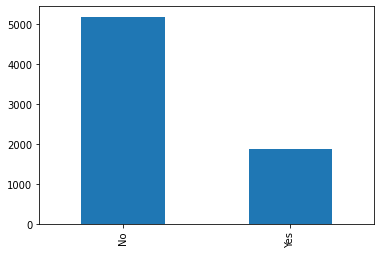

In [ ]:
# Cek jumlah data dari kolom target
df['Churn'].value_counts().plot(kind='bar')
print(df['Churn'].value_counts())

- Exp :  
  > - Jika dilihat menggunakan diagram histogram ada 5174 pelanggan No Churn
  > - Dan 1869 pelanggan Churn
  > - Berdasarkan kolom target, jumlah pelanggan No Churn lebih besar dibandingkan dengan Churn, hal ini dapat menyebabkan data menjadi inbalance dan kemungkinan akan mempengaruhi hasil dari model

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


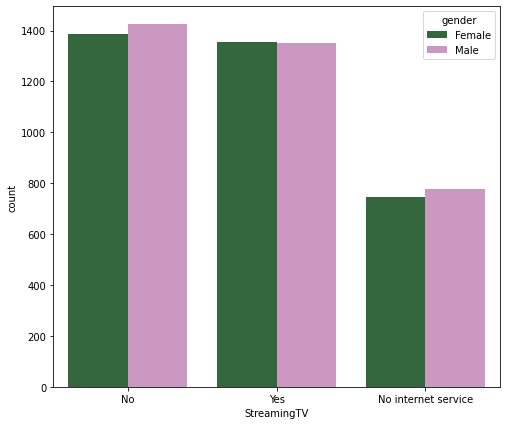

In [ ]:
# Visualisasi kolom StreamingTV
plt.figure(figsize=(8,7))
sns.countplot(x='StreamingTV',hue='gender',palette="cubehelix", data=df)
print(df['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


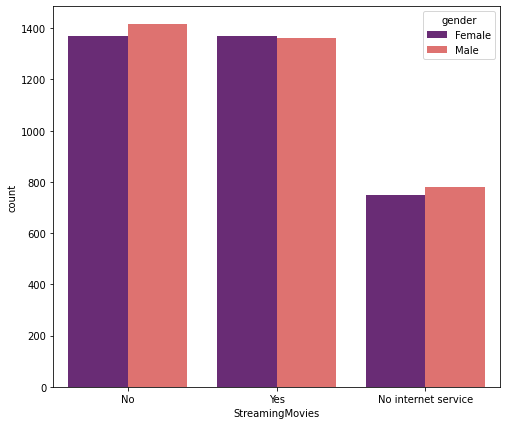

In [ ]:
# Visualisasi kolom StreamingMovies
plt.figure(figsize=(8,7))
sns.countplot(x='StreamingMovies',hue='gender',palette="magma", data=df)
print(df['StreamingMovies'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


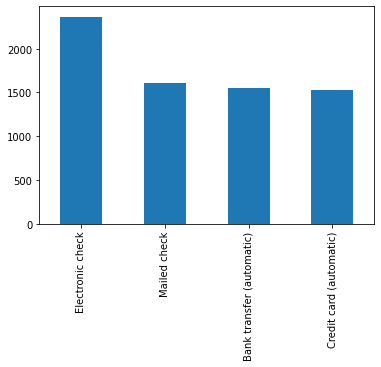

In [ ]:
# Cek jumlah data dari kolom target
df['PaymentMethod'].value_counts().plot(kind='bar')
print(df['PaymentMethod'].value_counts())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Cek unique value pada kolom kategorik
print ('gender unique :')
print (df['gender'].unique())
print ('*******************************************************************')
print ('Partner unique :')
print (df['Partner'].unique())
print ('*******************************************************************')
print ('Dependents unique :')
print (df['Dependents'].unique())
print ('*******************************************************************')
print ('PhoneService unique :')
print (df['PhoneService'].unique())
print ('*******************************************************************')
print ('MultipleLines unique :')
print (df['MultipleLines'].unique())
print ('*******************************************************************')
print ('InternetService unique :')
print (df['InternetService'].unique())
print ('*******************************************************************')
print ('OnlineSecurity unique :')
print (df['OnlineSecurity'].unique())
print ('*******************************************************************')
print ('OnlineBackup unique :')
print (df['OnlineBackup'].unique())
print ('*******************************************************************')
print ('DeviceProtection unique :')
print (df['DeviceProtection'].unique())
print ('*******************************************************************')
print ('TechSupport unique :')
print (df['TechSupport'].unique())
print ('*******************************************************************')
print ('StreamingTV unique :')
print (df['StreamingTV'].unique())
print ('*******************************************************************')
print ('StreamingMovies unique :')
print (df['StreamingMovies'].unique())
print ('*******************************************************************')
print ('Contract unique :')
print (df['Contract'].unique())
print ('*******************************************************************')
print ('PaperlessBilling unique :')
print (df['PaperlessBilling'].unique())
print ('*******************************************************************')
print ('PaymentMethod unique :')
print (df['PaymentMethod'].unique())
print ('*******************************************************************')

gender unique :
['Female' 'Male']
*******************************************************************
Partner unique :
['Yes' 'No']
*******************************************************************
Dependents unique :
['No' 'Yes']
*******************************************************************
PhoneService unique :
['No' 'Yes']
*******************************************************************
MultipleLines unique :
['No phone service' 'No' 'Yes']
*******************************************************************
InternetService unique :
['DSL' 'Fiber optic' 'No']
*******************************************************************
OnlineSecurity unique :
['No' 'Yes' 'No internet service']
*******************************************************************
OnlineBackup unique :
['Yes' 'No' 'No internet service']
*******************************************************************
DeviceProtection unique :
['No' 'Yes' 'No internet service']
****************************************

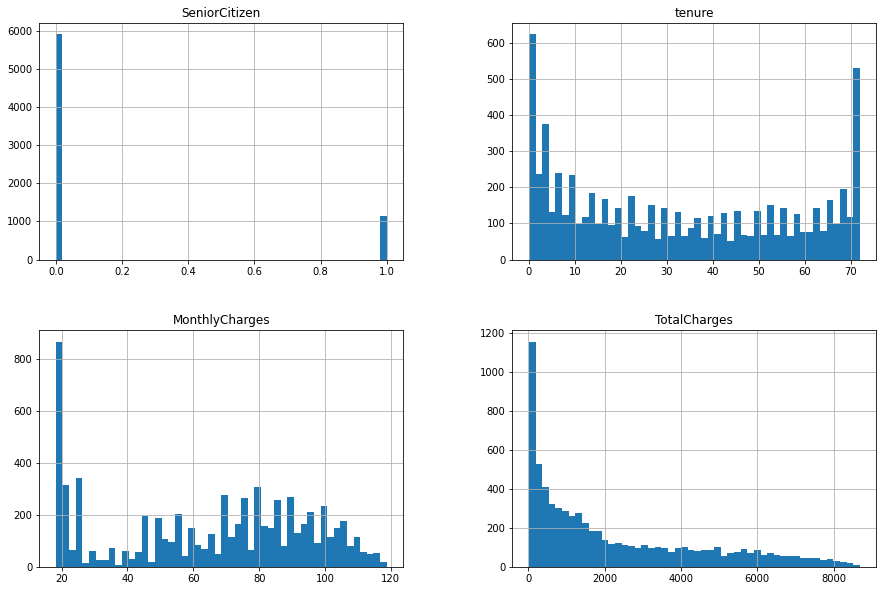

In [ ]:
# Visualisasi persebaran data setiap columns
%matplotlib inline
import matplotlib.pyplot as plt
df.select_dtypes(include=np.number).hist(bins=50, figsize=(15,10))

plt.show()

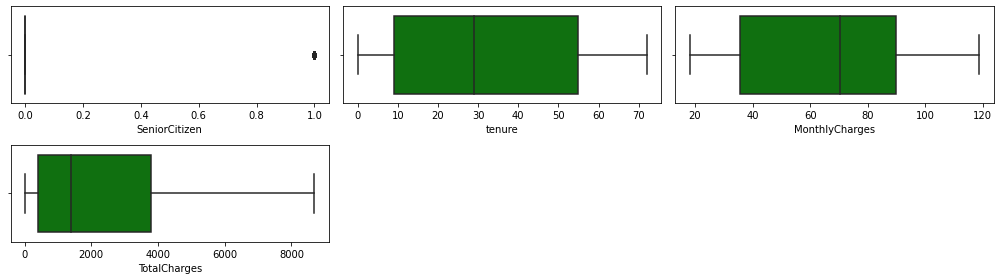

In [ ]:
plt.figure(figsize=(14,4))
for i in range(0,len(df.select_dtypes(include=np.number).columns)):
    plt.subplot(2,3, i+1)
    sns.boxplot(x=df[df.select_dtypes(include=np.number).columns[i]], color='green')
    plt.tight_layout()

#### 4.1 EDA Analysis

- Jika dilihat menggunakan diagram histogram ada 5174 pelanggan No Churn
- Dan 1869 pelanggan Churn
- Berdasarkan kolom target, jumlah pelanggan No Churn lebih besar dibandingkan dengan Churn, hal ini dapat menyebabkan data menjadi inbalance dan kemungkinan akan mempengaruhi hasil dari model
- untuk rata" biaya perbulan sebesar 64.761 dan standar deviasi 30.09
- Dan untuk rata" total biaya sebesar 2283.3 dan standar deviasi 2266.77
- Jika dilihat dari dataset baik laki-laki ataupun perempuan tidak banyak yang menggunakan streaming tv ataupun streaming movies
- jika dilihat dari diagram box plot tidak ada outlier pada setiap kolom numerik
- Kita akan melakukan pengecekan lebih lanjut pada saat preprocessing

# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

#### 5.1 Data Inference

In [ ]:
# Mengambil data inference dari data set
df_inf = df.sample(10, random_state=9)

# Remove Inference-Set dari Dataset

df_train_test = df.drop(df_inf.index)
df_train_test

# Reset Index 
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
print (df_inf.shape)
print (df_train_test.shape)

(10, 21)
(7033, 21)


In [ ]:
# feature encoding to Churn column
enc = LabelEncoder()
Churn_enc = enc.fit_transform(df_train_test['Churn'])

The mapping is as follows: No = 0 and yes =1

In [ ]:
Churn_enc = pd.DataFrame(Churn_enc, columns=['Churn-enc'])

In [ ]:
df_train_test = df_train_test.drop(columns=['Churn'])
df_train_test = pd.concat([df_train_test, Churn_enc], axis=1)

#### 5.2 Data Splitting

In [ ]:
# Split between X (features) and y (target)

X = df_train_test.drop('Churn-enc', axis=1)
y = df_train_test['Churn-enc']

# Split untuk Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Split untuk Train-Set and val-set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=9)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('val Size  : ', X_val.shape)
print('y_val Size  : ', y_val.shape)
print('y_train Size  : ', y_train.shape)
print('y_test Size  : ', y_test.shape)

Train Size :  (5063, 20)
Test Size  :  (1407, 20)
val Size  :  (563, 20)
y_val Size  :  (563,)
y_train Size  :  (5063,)
y_test Size  :  (1407,)


In [ ]:
# Mendapatkan Numerical Columns and Categorical Columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Split Train-Set, val-set and Test-Set berdasrkan tipe kolom (Numerical/Categorical)

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]



#### 5.3 Handling Missing value

In [ ]:
# Cek Missing value
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
print(X_val.isnull().sum().sum())
print(y_train.isnull().sum().sum())
print(y_test.isnull().sum().sum())
print(y_test.isnull().sum().sum())
print('total missing values = ', X_train.isnull().sum().sum() + X_test.isnull().sum().sum()+ X_val.isnull().sum().sum() + y_train.isnull().sum().sum() + y_test.isnull().sum().sum() + y_val.isnull().sum().sum())

7
2
2
0
0
0
total missing values =  11


In [ ]:
# Mengisi kolom Missing pada tipe data numerik
imputer_num = SimpleImputer(strategy="median")
imputer_num.fit(X_train_num)
X1 = imputer_num.transform(X_train_num)
X2 = imputer_num.transform(X_val_num)
X3 = imputer_num.transform(X_test_num)

X_train_num_tr = pd.DataFrame(X1, columns=X_train_num.columns, index=X_train_num.index)
X_val_num_tr = pd.DataFrame(X2, columns=X_val_num.columns, index=X_val_num.index)
X_test_num_tr = pd.DataFrame(X3, columns=X_test_num.columns, index=X_test_num.index)
print (X_train_num_tr.shape)
print (X_val_num_tr.shape)
print (X_test_num_tr.shape)

(5063, 4)
(563, 4)
(1407, 4)


In [ ]:
# Cek missing value after imputer
print(X_train_num_tr.isnull().sum().sum())
print(X_test_num_tr.isnull().sum().sum())
print(X_val_num_tr.isnull().sum().sum())
print('total missing values = ', X_train_num_tr.isnull().sum().sum() + X_test_num_tr.isnull().sum().sum()+ X_val_num_tr.isnull().sum().sum())

0
0
0
total missing values =  0


#### 5.4 Handling Outliers

In [ ]:
#Cek Skewness
skew1 = []
for i in num_columns:
    skew1.append(abs(X_train[i].skew()))

# Visualisasi ke data frame
df_skew1 = pd.DataFrame({'Kolom':num_columns, 'Skewness_abs':skew1})
df_skew1['normal'] = df_skew1.Skewness_abs.apply(lambda x: True if x<=0.5 else False)
df_skew1

,Kolom,Skewness_abs,normal
0,SeniorCitizen,1.900419,False
1,tenure,0.229441,True
2,MonthlyCharges,0.207465,True
3,TotalCharges,0.968952,False


In [ ]:
# Cek Persentasi untuk kolom yg terdistribusi normal
percent_outliers = []
for i in ['tenure', 'MonthlyCharges']:
    std = X_train[i].std()
    upper = X_train[i].mean() + 3*std
    lower = X_train[i].mean() - 3*std
    percent = len(X_train[(X_train[i]>upper)|(X_train[i]<lower)])*100/len(X_train)
    percent_outliers.append(percent)

# Visualisasi ke Data Frame
pd.DataFrame({'Kolom':['tenure', 'MonthlyCharges'], 'persentasi_outlier':percent_outliers})

,Kolom,persentasi_outlier
0,tenure,0.0
1,MonthlyCharges,0.0


In [ ]:
# Cek Persentasi untuk kolom yg terdistribusi skewed
percent_outliers2 = []
num = 3
for i in ['TotalCharges']:
    q1 = np.quantile(X_train[i], 0.25)
    q3 = np.quantile(X_train[i], 0.75)
    iqr = q3 - q1
    upper1 = q3 + num*iqr
    lower1 = q1 - num*iqr
    percent = len(X_train[(X_train[i]>upper1)|(X_train[i]<lower1)])*100/len(X_train)
    percent_outliers2.append(percent)

# Visualisasi ke Data Frame
pd.DataFrame({'Kolom':['TotalCharges'], 'persentasi_outlier':percent_outliers2})

,Kolom,persentasi_outlier
0,TotalCharges,0.0


#### 5.5 Features Selection

In [ ]:
features_cat = X_train_cat.copy()

# Encode categorical column
encoder = LabelEncoder() 

for i in features_cat:
    if features_cat[i].dtypes == 'object':
        features_cat[i] = encoder.fit_transform(features_cat[i])

Text(0.5, 1.0, 'Korelasi pada kolom Kategori')

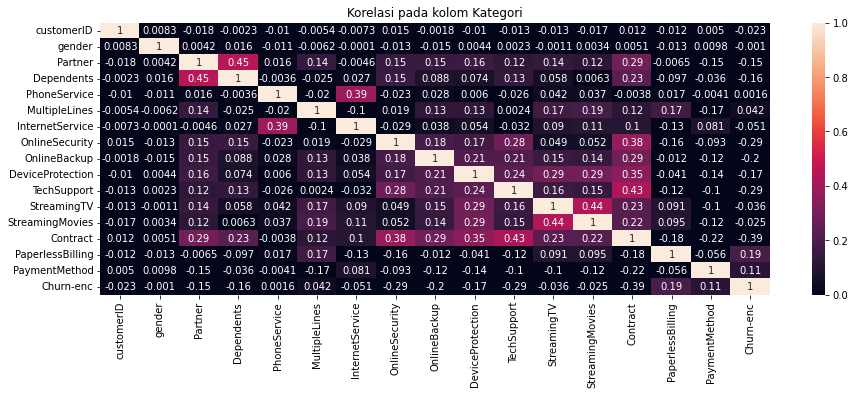

In [ ]:
# Cek kolerasi pada kolom categorikal
df_corr_cat_y = pd.concat([features_cat, y_train], axis=1)

plt.figure(figsize=(15, 5))
sns.heatmap(df_corr_cat_y.corr(), annot = True, vmin=0, vmax=1)
plt.title('Korelasi pada kolom Kategori')

Text(0.5, 1.0, 'Korelasi pada kolom Kategori')

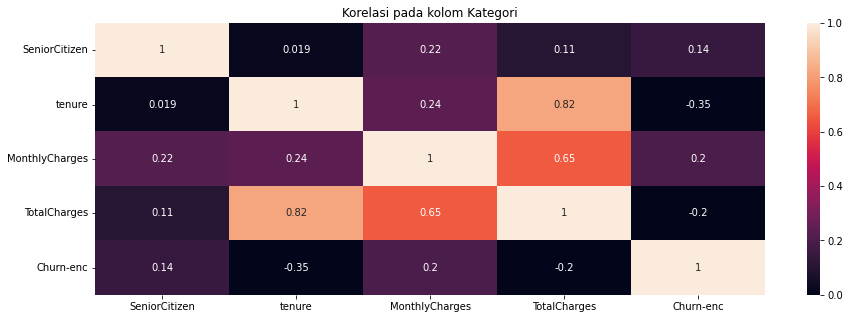

In [ ]:
# Cek Kolerasi Kolom Numerik
df_cor_num_y = pd.concat([X_train_num,y_train], axis=1)

plt.figure(figsize=(15, 5))
sns.heatmap(df_cor_num_y.corr(), annot = True, vmin=0, vmax=1)
plt.title('Korelasi pada kolom Kategori')

In [ ]:
# simpan Features selection kedalam variabel
cat_columns_select = ['Partner', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract'] # Total 8 kolom
num_columns_select = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges'] #total 4 kolom

print('Categorical column selected: ', cat_columns_select)
print('Numerikal column selected: ', num_columns_select)

Categorical column selected:  ['Partner', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']
Numerikal column selected:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# Split Train-Set, val-set and Test-Set setelah features selection berdasrkan tipe kolom (Numerical/Categorical)

X_train_num_sel = X_train_num_tr[num_columns_select]
X_train_cat_sel = X_train_cat[cat_columns_select]

X_test_num_sel = X_test_num_tr[num_columns_select]
X_test_cat_sel = X_test_cat[cat_columns_select]

X_val_num_sel = X_val_num_tr[num_columns_select]
X_val_cat_sel = X_val_cat[cat_columns_select]

#### 5.6 Scaling dan Encoding

In [ ]:
# Scaling data numerik
scaler = StandardScaler()
scaler.fit(X_train_num_sel)

# Scaling X_train
X_train_scaled = scaler.transform(X_train_num_sel)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = num_columns_select


# Scaling X_val
X_val_scaled = scaler.transform(X_val_num_sel)
X_val_scaled = pd.DataFrame(X_val_scaled)
X_val_scaled.columns = num_columns_select

# Scaling X_test
X_test_scaled = scaler.transform(X_test_num_sel)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = num_columns_select

In [ ]:
X_train_scaled.reset_index(drop=True, inplace=True)
X_val_scaled.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)
X_train_cat_sel.reset_index(drop=True, inplace=True)
X_test_cat_sel.reset_index(drop=True, inplace=True)
X_val_cat_sel.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [ ]:
X_train_bal = X_train_scaled.join(X_train_cat_sel)

#### 5.7 Handling data imbalance

In [ ]:
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([4,5, 6,7,8,9,10], random_state = 42)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_bal, y_train)
y_train_balanced.value_counts()

1    3732
0    3732
Name: Churn-enc, dtype: int64

In [ ]:
# Split between Numerical Features and Categorical Features

X_train_balanced_num = X_train_balanced[num_columns_select].reset_index().drop(['index'], axis = 1)
X_train_balanced_cat = X_train_balanced[cat_columns_select].reset_index().drop(['index'], axis = 1)

In [ ]:
# One Hot Encoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train_balanced_cat)
X_train_enc = encoder.transform(X_train_balanced_cat)
X_val_enc = encoder.transform(X_val_cat_sel)
X_test_enc = encoder.transform(X_test_cat_sel)

# Di bentuk dalam data Frame
X_train_enc = pd.DataFrame(X_train_enc)
X_val_enc = pd.DataFrame(X_val_enc)
X_test_enc = pd.DataFrame(X_test_enc)
X_train_enc.columns = encoder.get_feature_names()
X_val_enc.columns = encoder.get_feature_names()
X_test_enc.columns = encoder.get_feature_names()

In [ ]:
# Menggabungkan data Numerikal dan kategorikal pada X_train, X_val dan X_test
X_train_final = X_train_balanced_num.join(X_train_enc)
X_val_final = X_val_scaled.join(X_val_enc)
X_test_final = X_test_scaled.join(X_test_enc)

# 6. Pipeline

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final,y_train_balanced)).shuffle(1000).batch(23)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final,y_val)).shuffle(1000).batch(23)

# 7. Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

#### 7.1 Sequential API Model Definition

In [ ]:
# buat arsitekturnya
model = Sequential()
model.add(Flatten(input_shape=X_train_final.shape[1:]))
model.add(Dense(13, activation='relu')) # hidden layer 1
model.add(Dense(7, activation='relu')) # hidden layer 2
model.add(Dense(1, activation='sigmoid')) # output layer

# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

#### 7.2 Functional API Model Definition

In [ ]:
# deklarasikan arsitektur
data_in = Input(shape=X_train_final.shape[1:])
data_flat = Flatten()(data_in)
data_drop = Dropout(0.25)(data_flat)
hidden_1 = Dense(13, activation='elu')(data_drop)
hidden_drop = Dropout(0.25)(hidden_1)
hidden_2 = Dense(7, activation='elu')(hidden_drop)
hidden_drop_2 = Dropout(0.25)(hidden_2)
out = Dense(1, activation='sigmoid')(hidden_drop_2)

model2 = Model(inputs=data_in, outputs=out)

# compile
model2.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

# 8. Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

#### 8.1 Training Model Sequential API

In [ ]:
# train
history = model.fit(X_train_final, y_train_balanced, epochs=100, validation_data=(X_val_final, y_val))

Epoch 1/100
234/234 [==============================] - 1s 3ms/step - loss: 0.5463 - accuracy: 0.7294 - val_loss: 0.4908 - val_accuracy: 0.7460
Epoch 2/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7666 - val_loss: 0.4689 - val_accuracy: 0.7602
Epoch 3/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7693 - val_loss: 0.4578 - val_accuracy: 0.7691
Epoch 4/100
234/234 [==============================] - 1s 2ms/step - loss: 0.4734 - accuracy: 0.7742 - val_loss: 0.4625 - val_accuracy: 0.7655
Epoch 5/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7759 - val_loss: 0.4605 - val_accuracy: 0.7638
Epoch 6/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7710 - val_loss: 0.4786 - val_accuracy: 0.7620
Epoch 7/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7751 - val_loss: 0.4560 - val_accuracy: 0.7673

#### 8.2 Training Model Functional API

In [ ]:
# train
history2 = model2.fit(X_train_final, y_train_balanced, epochs=100, validation_data=(X_val_final, y_val))

Epoch 1/100
234/234 [==============================] - 1s 3ms/step - loss: 0.6334 - accuracy: 0.6513 - val_loss: 0.5220 - val_accuracy: 0.7425
Epoch 2/100
234/234 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7182 - val_loss: 0.5065 - val_accuracy: 0.7620
Epoch 3/100
234/234 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7315 - val_loss: 0.5024 - val_accuracy: 0.7673
Epoch 4/100
234/234 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7296 - val_loss: 0.5068 - val_accuracy: 0.7638
Epoch 5/100
234/234 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7358 - val_loss: 0.4960 - val_accuracy: 0.7691
Epoch 6/100
234/234 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7346 - val_loss: 0.4878 - val_accuracy: 0.7691
Epoch 7/100
234/234 [==============================] - 1s 2ms/step - loss: 0.5294 - accuracy: 0.7476 - val_loss: 0.4841 - val_accuracy: 0.7726

# 9. Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

#### 9.1 Evaluation Model Sequential API

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.431262,0.798767,0.491160,0.744227
96,0.432021,0.796758,0.469277,0.761989
97,0.431229,0.795284,0.489397,0.749556
98,0.431188,0.797428,0.469581,0.770870
99,0.431514,0.796758,0.481261,0.751332


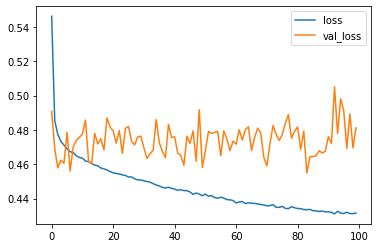

In [ ]:
metrics[['loss', 'val_loss']].plot()

In [ ]:
y_pred = model.predict(X_test_final)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print('Accuracy - Train Set  : ', accuracy_score(y_test, y_pred), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred), '\n')

Accuracy - Train Set  :  0.7277896233120114 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1036
           1       0.49      0.77      0.60       371

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407
 



#### 9.2 Evaluation Model Funtional API

In [ ]:
metrics2 = pd.DataFrame(history2.history)
metrics2.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.510185,0.757637,0.475565,0.767318
96,0.514039,0.745981,0.483802,0.761989
97,0.510441,0.754421,0.488945,0.754885
98,0.513467,0.751742,0.486734,0.761989
99,0.510836,0.754019,0.480871,0.763766


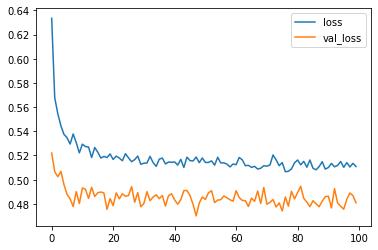

In [ ]:
metrics2[['loss', 'val_loss']].plot()

In [ ]:
y_pred2 = model2.predict(X_test_final)
y_pred2 = np.where(y_pred2 >= 0.5, 1, 0)
print('Accuracy - Train Set  : ', accuracy_score(y_test, y_pred2), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred2), '\n')

Accuracy - Train Set  :  0.7377398720682303 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1036
           1       0.50      0.78      0.61       371

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407
 



# 10. Model Improvement

In [ ]:
# buat arsitekturnya
model3 = Sequential()
model3.add(Flatten(input_shape=X_train_final.shape[1:]))
model3.add(Dense(13, use_bias=True, activation='elu')) # hidden layer 1
keras.layers.BatchNormalization()
model3.add(Dense(7, use_bias=True, activation='elu')) # hidden layer 2
keras.layers.BatchNormalization()
model3.add(Dense(1, activation='sigmoid')) # output layer

# compile
model3.compile(loss='binary_crossentropy',
              optimizer= keras.optimizers.SGD(clipvalue=1.0), # paling modern
              metrics=['accuracy'])

# train
history3 = model3.fit(X_train_final, y_train_balanced, epochs=30, validation_data=(X_val_final, y_val))

Epoch 1/30
234/234 [==============================] - 1s 2ms/step - loss: 0.5883 - accuracy: 0.7019 - val_loss: 0.5271 - val_accuracy: 0.7371
Epoch 2/30
234/234 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7543 - val_loss: 0.4917 - val_accuracy: 0.7478
Epoch 3/30
234/234 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7603 - val_loss: 0.4940 - val_accuracy: 0.7513
Epoch 4/30
234/234 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7614 - val_loss: 0.4856 - val_accuracy: 0.7584
Epoch 5/30
234/234 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7643 - val_loss: 0.4855 - val_accuracy: 0.7602
Epoch 6/30
234/234 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7663 - val_loss: 0.4773 - val_accuracy: 0.7638
Epoch 7/30
234/234 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7674 - val_loss: 0.4799 - val_accuracy: 0.7691
Epoch 

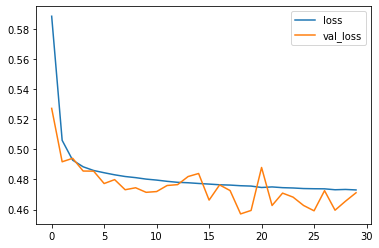

In [ ]:
metrics3 = pd.DataFrame(history3.history)
metrics3[['loss', 'val_loss']].plot()

In [ ]:
y_pred3 = model3.predict(X_test_final)
y_pred3 = np.where(y_pred3 >= 0.5, 1, 0)
print('Accuracy - Train Set  : ', accuracy_score(y_test, y_pred3), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred3), '\n')

Accuracy - Train Set  :  0.7299218194740583 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1036
           1       0.49      0.77      0.60       371

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407
 



# 11. Model Saving

#### 11.1 Pipeline preprocessing

In [ ]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns_select),
    ('pipe_cat', cat_pipeline, cat_columns_select)])

#### 11.2 Saving pipeline preprocessing

In [ ]:
with open('Churn_pre.pkl','wb') as f:
    pickle.dump(data_pipeline, f)

#### 11.3 Saving Model

In [ ]:
model2.save("nn_Telco_Cus.h5")

# 12. Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [ ]:
# feature encoding to Churn column
enc = LabelEncoder()
Churn_inf = enc.fit_transform(df_inf['Churn'])

Churn_inf = pd.DataFrame(Churn_inf, columns=['Churn-enc'])
df_inf = df_inf.drop(columns=['Churn'])
df_inf = pd.concat([df_inf, Churn_inf], axis=1)

# Split between X (features) and y (target)

X_inf = df_inf.drop('Churn-enc', axis=1)
y_inf = df_inf['Churn-enc']

In [ ]:
final_inf = data_pipeline.fit_transform (X_inf)
final_inf.shape

(10, 24)

In [ ]:
y_pred_inf = model2.predict(final_inf)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
print('Accuracy - Train Set  : ', accuracy_score(y_inf, y_pred_inf), '\n')
print('Classification Report : \n', classification_report(y_inf, y_pred_inf), '\n')

Accuracy - Train Set  :  0.8 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10
 



# 13. Pengambilan Kesimpulan

> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

#### Model Analysis

- dataset ini menggunakan model ANN Sequential dan Funtional API
- memakai 2 hidden layer menggunakan activation function elu dan output layer menggunakan activation function menggunakan sigmoid
- pada model sequential API terlihat pada diagram masih terjadi exploding gradient
- untuk model funtional model terlihat lebih membaik dengan menggunakan drpo out
- Melakukan model improvement pada model sequential dengan menggunakan batch normalization untuk mengurangi exploding gradient dan set epoch 30
- hasil yang dikeluarkan dari model ini memiliki tingkat akurasi 75% terhadap Y_test
- dilakukan 10 data inferenve dan melakukan prediksi dengan menggunakan model funtional
- dari hasil prediksi model mendapatkan akurasi sebesar 80%